# Merging, Joining, and Concatenating


There are 3 main ways of combining DataFrames together: Merging, Joining and Concatenating.

In [1]:
import pandas as pd

### Concatenation

Hàm concat dùng để nối các dữ liệu cấu trúc pandas với nhau.

pandas.concat(objs, axis=0, join=’outer’, join_axes=None, ignore_index=False, keys=None, levels=None, names=None, verify_integrity=False, copy=True)

**Tham số thường dùng:**

* objs: danh sách các object Series, DataFrame, hoặc Panel 
* axis: int (mặc định 0), (0: concat theo cột), (1: concat theo hàng)
* join: inner/ outer (mặc định outer)
* ignore_index: boolean (mặc định False), giá trị True: giá trị index sẽ không được sử dụng trong khi concat. Kết quả trả về index được đánh lại từ 0

**Ex1:**

In [2]:
df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'],
                    'B': ['B0', 'B1', 'B2', 'B3'],
                    'C': ['C0', 'C1', 'C2', 'C3'],
                    'D': ['D0', 'D1', 'D2', 'D3']}, index = [0, 1, 2, 3])
df1

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


In [3]:
df2 = pd.DataFrame({'A': ['A4', 'A5', 'A6', 'A7'],
                    'B': ['B4', 'B5', 'B6', 'B7'],
                    'C': ['C4', 'C5', 'C6', 'C7'],
                    'D': ['D4', 'D5', 'D6', 'D7']}, index=[4, 5, 6, 7]) 
df2

,A,B,C,D
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7


In [4]:
df3 = pd.DataFrame({'B': ['B2', 'B3', 'B6', 'B7'],
                    'D': ['D2', 'D3', 'D6', 'D7'],
                    'F': ['F2', 'F3', 'F6', 'F7']}, index=[2, 3, 6, 7])
df3

,B,D,F
2,B2,D2,F2
3,B3,D3,F3
6,B6,D6,F6
7,B7,D7,F7


**Concatenation:**

_________

Axis: 

In [5]:
pd.concat([df2, df1]) # axis = 0 (default)

,A,B,C,D
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


In [6]:
pd.concat([df2, df1], axis = 1) # Sử dụng logic để nối, nếu không chỉ định tham số join thì mặc định là sẽ ‘outer’

,A,B,C,D,A,B,C,D
0,NaN,NaN,NaN,NaN,A0,B0,C0,D0
1,NaN,NaN,NaN,NaN,A1,B1,C1,D1
2,NaN,NaN,NaN,NaN,A2,B2,C2,D2
3,NaN,NaN,NaN,NaN,A3,B3,C3,D3
4,A4,B4,C4,D4,NaN,NaN,NaN,NaN
5,A5,B5,C5,D5,NaN,NaN,NaN,NaN
6,A6,B6,C6,D6,NaN,NaN,NaN,NaN
7,A7,B7,C7,D7,NaN,NaN,NaN,NaN


___________

Join:

In [7]:
pd.concat([df2, df1], axis = 1) # Sử dụng logic để nối, nếu không chỉ định tham số join thì mặc định là sẽ ‘outer’

,A,B,C,D,A,B,C,D
0,NaN,NaN,NaN,NaN,A0,B0,C0,D0
1,NaN,NaN,NaN,NaN,A1,B1,C1,D1
2,NaN,NaN,NaN,NaN,A2,B2,C2,D2
3,NaN,NaN,NaN,NaN,A3,B3,C3,D3
4,A4,B4,C4,D4,NaN,NaN,NaN,NaN
5,A5,B5,C5,D5,NaN,NaN,NaN,NaN
6,A6,B6,C6,D6,NaN,NaN,NaN,NaN
7,A7,B7,C7,D7,NaN,NaN,NaN,NaN


In [8]:
pd.concat([df2, df1], join = 'inner', axis = 1) 

,A,B,C,D,A,B,C,D


In [9]:
pd.concat([df1, df3], axis = 1) 

,A,B,C,D,B,D,F
0,A0,B0,C0,D0,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3
6,NaN,NaN,NaN,NaN,B6,D6,F6
7,NaN,NaN,NaN,NaN,B7,D7,F7


In [10]:
pd.concat([df1, df3], join = 'inner', axis = 1) # Chỉ định tham số join=’inner’:

,A,B,C,D,B,D,F
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3


________

ignore_index:

In [11]:
pd.concat([df2, df1], ignore_index = True, join = 'inner')

,A,B,C,D
0,A4,B4,C4,D4
1,A5,B5,C5,D5
2,A6,B6,C6,D6
3,A7,B7,C7,D7
4,A0,B0,C0,D0
5,A1,B1,C1,D1
6,A2,B2,C2,D2
7,A3,B3,C3,D3


In [12]:
pd.concat([df1, df3, df2], ignore_index=False)

,A,B,C,D,F
0,A0,B0,C0,D0,NaN
1,A1,B1,C1,D1,NaN
2,A2,B2,C2,D2,NaN
3,A3,B3,C3,D3,NaN
2,NaN,B2,NaN,D2,F2
3,NaN,B3,NaN,D3,F3
6,NaN,B6,NaN,D6,F6
7,NaN,B7,NaN,D7,F7
4,A4,B4,C4,D4,NaN
5,A5,B5,C5,D5,NaN


**Ex2:**

In [13]:
left = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
                     'A': ['A0', 'A1', 'A2', 'A3'],
                     'B': ['B0', 'B1', 'B2', 'B3']})
left

,key,A,B
0,K0,A0,B0
1,K1,A1,B1
2,K2,A2,B2
3,K3,A3,B3


In [14]:
right = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
                      'C': ['C0', 'C1', 'C2', 'C3'],
                      'D': ['D0', 'D1', 'D2', 'D3']}) 
right

,key,C,D
0,K0,C0,D0
1,K1,C1,D1
2,K2,C2,D2
3,K3,C3,D3


**Concatenation:**

In [15]:
pd.concat([right, left])

,key,C,D,A,B
0,K0,C0,D0,NaN,NaN
1,K1,C1,D1,NaN,NaN
2,K2,C2,D2,NaN,NaN
3,K3,C3,D3,NaN,NaN
0,K0,NaN,NaN,A0,B0
1,K1,NaN,NaN,A1,B1
2,K2,NaN,NaN,A2,B2
3,K3,NaN,NaN,A3,B3


In [16]:
pd.concat([right, left], axis = 1)

,key,C,D,key,A,B
0,K0,C0,D0,K0,A0,B0
1,K1,C1,D1,K1,A1,B1
2,K2,C2,D2,K2,A2,B2
3,K3,C3,D3,K3,A3,B3


____

### Merging

The **merge** function allows you to merge DataFrames together using a similar logic as merging SQL Tables together. 

**pandas.merge(left, right, how=’inner’, on=None, left_on=None, right_on=None, left_index=False, right_index=False, sort=False, suffixes=(‘_x’, ‘_y’), copy=True, indicator=False, validate=None)**

Tham số thường dùng:

* **left:** DataFrame
* **right:** DataFrame
* **how:** {‘left’, ‘right’, ‘outer’, ‘inner’}, mặc định ‘inner’
* **on:** tên các cột hoặc index level để join. (chú ý: phải có ở cả 2 DataFrames)
* **left_on:** tên các cột hoặc index level của DataFrame bên trái để join
* **right_on:** tên các cột hoặc index level của DataFrame bên phải để join
* **sort:** boolean, mặc định là False
* **indicator:** boolean hoặc string, mặc định là False, nếu để True: sẽ có thêm một cột “_merge”(tên cột sẽ thay đổi theo string nếu được truyền vào) với thông tin source của từng row
    * left_only: key chỉ xuất hiện ở DataFrame bên trái
    * right_only: key chỉ xuất hiện ở DataFrame bên phải
    * both: key xuất hiện ở cả 2 DataFrame
* **validate:** string, mặc định là None.
    * “one_to_one” or “1:1”: kiểm tra liệu key hợp nhất có riêng biệt ở cả 2 DataFrame không
    * “one_to_many” or “1:m”: kiểm tra liệu key hợp nhất có riêng biệt ở DataFrame bên trái không
    * “many_to_one” or “m:1”: kiểm tra liệu key hợp nhất có riêng biệt ở DataFrame bên phải không
    * “many_to_many” or “m:m”: được phép nhưng không đưa ra kết quả

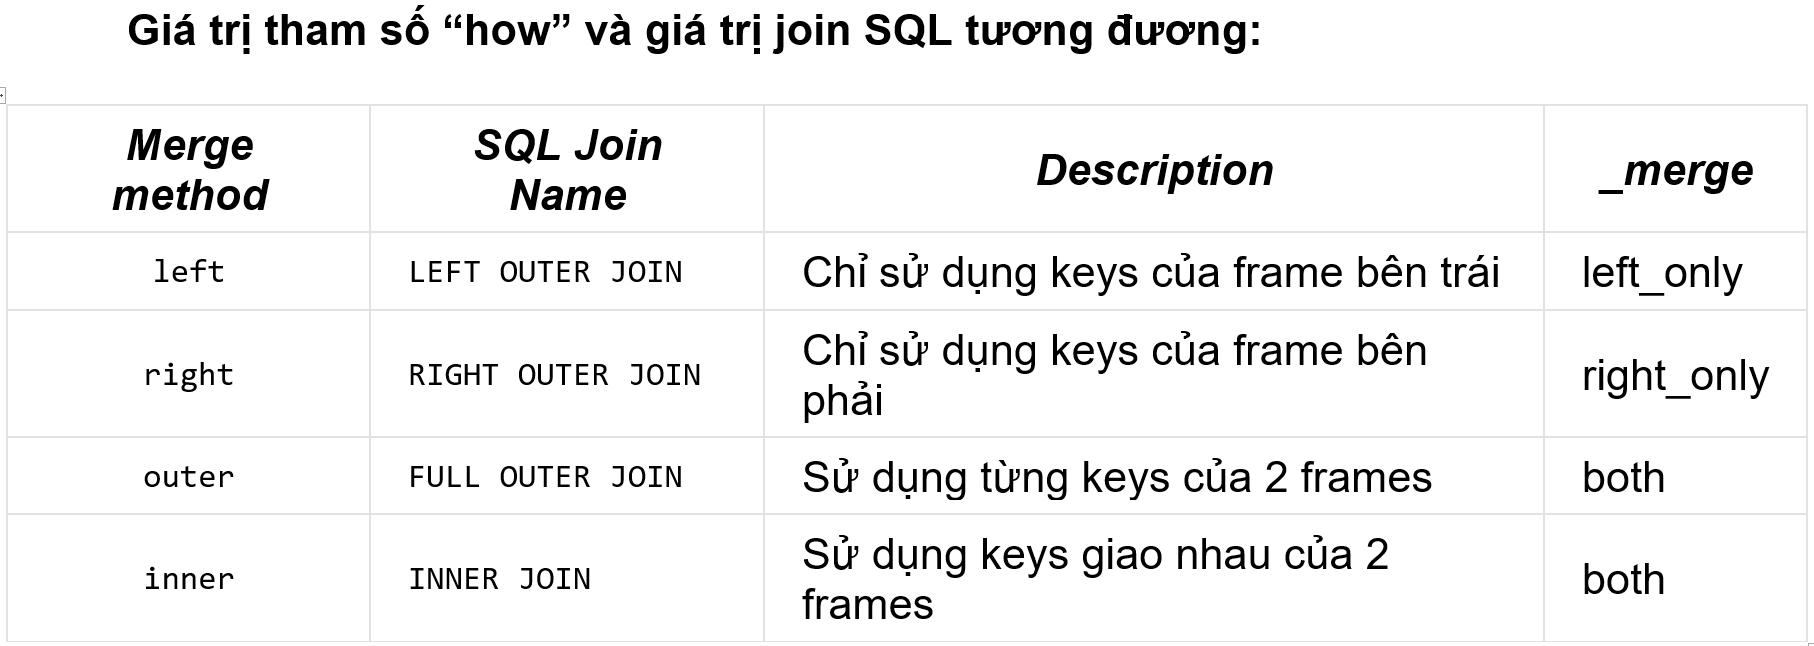

**Ex1:**

In [17]:
pd.merge(left, right, how = 'inner', on = 'key')

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K1,A1,B1,C1,D1
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3


**Ex2:**

In [18]:
df4 = pd.DataFrame({'key1': ['K0', 'K0', 'K1', 'K2'],
                     'key2': ['K0', 'K1', 'K0', 'K1'],
                     'A': ['A0', 'A1', 'A2', 'A3'],
                     'B': ['B0', 'B1', 'B2', 'B3']})
df4

,key1,key2,A,B
0,K0,K0,A0,B0
1,K0,K1,A1,B1
2,K1,K0,A2,B2
3,K2,K1,A3,B3


In [19]:
df5 = pd.DataFrame({'key1': ['K0', 'K1', 'K1', 'K2'],
                      'key2': ['K0', 'K0', 'K0', 'K0'],
                      'C': ['C0', 'C1', 'C2', 'C3'],
                      'D': ['D0', 'D1', 'D2', 'D3']})
df5

,key1,key2,C,D
0,K0,K0,C0,D0
1,K1,K0,C1,D1
2,K1,K0,C2,D2
3,K2,K0,C3,D3


In [20]:
pd.merge(df4, df5)
# = pd.merge(df4, df5, on = ['key1', 'key2'])

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K1,K0,A2,B2,C1,D1
2,K1,K0,A2,B2,C2,D2


In [21]:
pd.merge(df4, df5, how = 'inner', on = 'key1')

,key1,key2_x,A,B,key2_y,C,D
0,K0,K0,A0,B0,K0,C0,D0
1,K0,K1,A1,B1,K0,C0,D0
2,K1,K0,A2,B2,K0,C1,D1
3,K1,K0,A2,B2,K0,C2,D2
4,K2,K1,A3,B3,K0,C3,D3


In [22]:
pd.merge(df4, df5, how = 'inner', on = 'key2')

,key1_x,key2,A,B,key1_y,C,D
0,K0,K0,A0,B0,K0,C0,D0
1,K0,K0,A0,B0,K1,C1,D1
2,K0,K0,A0,B0,K1,C2,D2
3,K0,K0,A0,B0,K2,C3,D3
4,K1,K0,A2,B2,K0,C0,D0
5,K1,K0,A2,B2,K1,C1,D1
6,K1,K0,A2,B2,K1,C2,D2
7,K1,K0,A2,B2,K2,C3,D3


In [23]:
pd.merge(df4, df5, how = 'outer', on = ['key1', 'key2'])

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K0,K1,A1,B1,NaN,NaN
2,K1,K0,A2,B2,C1,D1
3,K1,K0,A2,B2,C2,D2
4,K2,K1,A3,B3,NaN,NaN
5,K2,K0,NaN,NaN,C3,D3


In [24]:
pd.merge(df4, df5, how = 'right', on = ['key1', 'key2'])

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K1,K0,A2,B2,C1,D1
2,K1,K0,A2,B2,C2,D2
3,K2,K0,NaN,NaN,C3,D3


In [25]:
pd.merge(df4, df5, how = 'left', on = ['key1', 'key2'])

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K0,K1,A1,B1,NaN,NaN
2,K1,K0,A2,B2,C1,D1
3,K1,K0,A2,B2,C2,D2
4,K2,K1,A3,B3,NaN,NaN


_______________

### Joining

Joining is a convenient method for combining the columns of two potentially differently-indexed DataFrames into a single result DataFrame.

In [26]:
left = pd.DataFrame({'A': ['A0', 'A1', 'A2'],
                     'B': ['B0', 'B1', 'B2']},
                      index=['K0', 'K1', 'K2']) 

right = pd.DataFrame({'C': ['C0', 'C2', 'C3'],
                    'D': ['D0', 'D2', 'D3']},
                      index=['K0', 'K2', 'K3'])

In [27]:
left.join(right)

,A,B,C,D
K0,A0,B0,C0,D0
K1,A1,B1,NaN,NaN
K2,A2,B2,C2,D2


In [28]:
left.join(right, how='outer')

,A,B,C,D
K0,A0,B0,C0,D0
K1,A1,B1,NaN,NaN
K2,A2,B2,C2,D2
K3,NaN,NaN,C3,D3
